In [1]:
from GeneticAlg import GenProg
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
var = [['Y_OfExp', 'Payment'], 
[1.4000000000000001, 46206.0],
[1.6, 37732.0],
[2.1, 43526.0],
[2.3000000000000003, 39892.0],
[3.0, 56643.0],
[3.1, 60151.0],
[3.3000000000000003, 54446.0],
[3.3000000000000003, 64446.0],
[3.8000000000000003, 57190.0],
[4.0, 63219.0],
[4.1, 55795.0],
[4.1, 56958.0],
[4.199999999999999, 57082.0],
[4.6, 61112.0],
[5.0, 67939.0],
[5.199999999999999, 66030.0],
[5.3999999999999995, 83089.0],
[6.0, 81364.0],
[6.1, 93941.0],
[6.8999999999999995, 91739.0],
[7.199999999999999, 98274.0],
[8.0, 101303.0],
[8.299999999999999, 113813.0],
[8.799999999999999, 109432.0],
[9.1, 105583.0],
[9.6, 116970.0],
[9.7, 112636.0],
[10.4, 122392.0],
[10.6, 121873.0]]
maxPay = max([n[1] for n in var[1:]])
for i in range(1, len(var)):
    var[i][1] = var[i][1]/maxPay

In [14]:
genP = GenProg(var, var[0][:-1], 100, 3, 0.2, 500, error=1e-3)
_ = genP.findSolution()

0 : 6.123000048319227e-06 s
100 : 6.7369209360001605 s
200 : 13.495688390000169 s
300 : 19.08715544300003 s
400 : 25.104613870000094 s
elapse time :  31.694471 s - solution: sin((Y_OfExp / (2.718281828459045 * 2.718281828459045))) - value: None - fitness: 0.004553300926131256


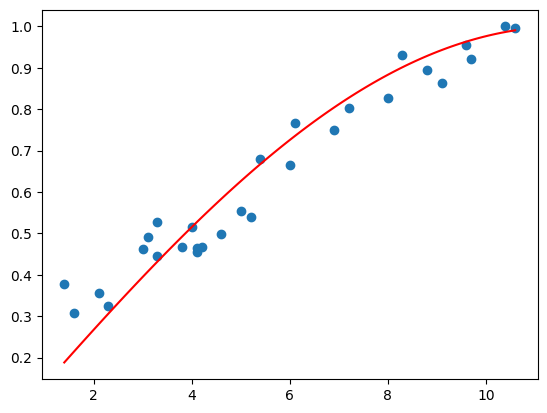

In [15]:
varX = [v[0] for v in var[1:]]
varY = [v[1] for v in var[1:]]

axisX = [['Y_OfExp']]
for n in np.linspace(min(varX), max(varX), 100):
    axisX.append([n])

bestGeneValues = [n[-1] for n in genP.bestFit.gene.valueCalcVar(axisX)[1:]]


plt.scatter(varX, varY)
plt.plot(axisX[1:], bestGeneValues, c = 'red')

plt.show()

In [5]:
def function1(x):
    return x**2

xaxis = np.linspace(-2, 2, 50)
yaxis = [function1(n) for n in xaxis]

varF1 = [['x', 'ExpectedValue']]
for i, j in zip(xaxis, yaxis):
    varF1.append([i, j])

In [6]:
genP2 = GenProg(varF1, varF1[0][:-1], 100, 3, 0.15, 500, error=1e-3)
_ = genP2.findSolution()

0 : 5.6989999848156e-06 s
elapse time :  0.185233 s - solution: (x * x) - value: None - fitness: 0.0


/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: invalid value encountered in scalar power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)


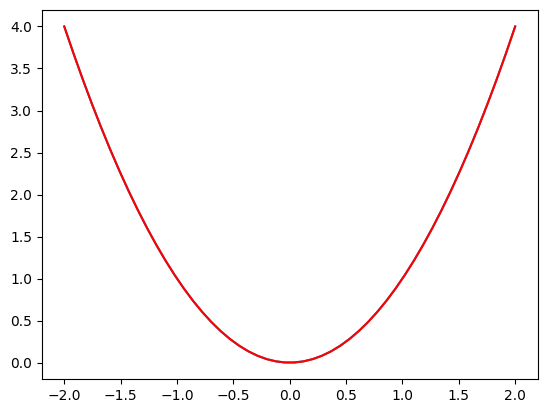

In [7]:
for n in np.linspace(-2, 2, 100):
    axisX.append([n])

bestGeneValues2 = [n[-1] for n in genP2.bestFit.gene.valueCalcVar(varF1)[1:]]


plt.plot(xaxis, yaxis)
plt.plot(xaxis, bestGeneValues2, c = 'red')

plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [9]:
data = pd.read_csv('data.csv')
numeric_cols = ['Volume', 'Weight', 'CO2']
data[numeric_cols] = MinMaxScaler().fit_transform(data[numeric_cols])
data.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,0.0625,0.000000,0.300000
1,Mitsubishi,Space Star,0.1875,0.387029,0.166667
2,Skoda,Citigo,0.0625,0.145397,0.166667
3,Fiat,500,0.0000,0.078452,0.000000
4,Mini,Cooper,0.3750,0.366109,0.500000


In [10]:
varData = [['Volume', 'Weight', 'Co2Emmision']]

for i in range(len(data)):
    varData.append([data['Volume'][i], data['Weight'][i], data['CO2'][i]])

In [11]:
print(varData)

[['Volume', 'Weight', 'Co2Emmision'], [0.0625, 0.0, 0.2999999999999998], [0.1875, 0.38702928870292885, 0.16666666666666652], [0.0625, 0.14539748953974896, 0.16666666666666652], [0.0, 0.07845188284518823, 0.0], [0.375, 0.36610878661087864, 0.5], [0.0625, 0.14539748953974896, 0.5], [0.3125, 0.3336820083682007, 0.0], [0.375, 0.6014644351464434, 0.06666666666666643], [0.375, 0.3368200836820082, 0.2666666666666666], [0.4375, 0.37656903765690364, 0.2999999999999998], [0.125, 0.19874476987447698, 0.2999999999999998], [0.25, 0.20920502092050197, 0.3666666666666667], [0.0625, 0.3368200836820082, 0.2999999999999998], [0.4375, 0.4832635983263597, 0.1333333333333333], [0.4375, 0.5606694560669455, 0.2333333333333334], [0.4375, 0.5648535564853555, 0.2333333333333334], [0.4375, 0.6014644351464434, 0.2999999999999998], [0.8125, 0.5125523012552301, 0.4666666666666668], [0.4375, 0.34414225941422594, 0.4666666666666668], [0.6875, 0.5627615062761505, 0.5], [0.4375, 0.8305439330543932, 0.1333333333333333],

In [12]:
carsGenP = GenProg(varData, varData[0][:-1], 100, 5, 0.2, 500, 1e-3)
_ = carsGenP.findSolution()

0 : 4.910999905405333e-06 s


/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  '/' : lambda x, y: (x) / (y),
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: invalid value encountered in scalar power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:62: RuntimeWarning: invalid value encountered in scalar divide
  '/' : lambda x, y: (x) / (y),
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:61: RuntimeWarning: invalid value encountered in scalar multiply
  '*' : lambda x, y: (x) * (y),
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: divide by zero encountered in scalar power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)
/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/genome.py:148: RuntimeWarning: overflow encountered in scalar power
  self.geneError 

100 : 15.158630768999956 s


/home/petar/Documents/MATF/Semestar7/RI/Projekat/RIProjekat/node.py:63: RuntimeWarning: overflow encountered in scalar power
  '**' : lambda x, y: (math.copysign(abs(x**y), x)


200 : 30.495865490999904 s
300 : 45.31356784399986 s
400 : 60.970476410999936 s
elapse time :  75.902677 s - solution: (((Volume ** ((Volume + (Weight + Weight)) + (Volume / 0.5722339378882644))) + Weight) * 0.5722339378882644) - value: None - fitness: 0.030334871689388712


In [13]:
xCars = [v[0] for v in varData[1:]]
yCars = [v[1] for v in varData[1:]]

Xosa = [['Weight']]
for n in np.linspace(min(xCars), max(xCars), 100):
    Xosa.append([n])

carPredictions = [n[-1] for n in carsGenP.bestFit.gene.valueCalcVar(Xosa)[1:]]

plt.scatter(xCars, yCars)
plt.plot(Xosa[1:], carPredictions, c = 'red')

plt.show()

AttributeError: There is no value for variable: Volume

In [ ]:
for i in range(10):
    print(i)